# Notebook: car-price-prediction

## Data Dictionary

```
    Car_ID: Unique id of each observation (Interger)
    Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
    carCompany: Name of car company (Categorical)
    fueltype: Car fuel type i.e gas or diesel (Categorical)
    aspiration: Aspiration used in a car (Categorical)
    doornumber: Number of doors in a car (Categorical)
    carbody: body of car (Categorical)
    drivewheel: type of drive wheel (Categorical)
    enginelocation: Location of car engine (Categorical)
    wheelbase: Weelbase of car (Numeric)
    carlength: Length of car (Numeric)
    carwidth: Width of car (Numeric)
    carheight: height of car (Numeric)
    curbweight: The weight of a car without occupants or baggage. (Numeric)
    enginetype: Type of engine. (Categorical)
    cylindernumber: cylinder placed in the car (Categorical)
    enginesize: Size of car (Numeric)
    fuelsystem: Fuel system of car (Categorical)
    boreratio: Boreratio of car (Numeric)
    stroke: Stroke or volume inside the engine (Numeric)
    compressionratio: compression ratio of car (Numeric)
    horsepower: Horsepower (Numeric)
    peakrpm: car peak rpm (Numeric)
    citympg: Mileage in city (Numeric)
    highwaympg: Mileage on highway (Numeric)
    price(Dependent variable): Price of car (Numeric)
```

## Required Imports

In [3]:
import re
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import tree

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBRegressor

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

# Importing and Understanding the data

In [4]:
cols_to_use = ['symboling', 'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
            'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df = pd.read_csv("data.csv", usecols=cols_to_use)

In [63]:
print(df.shape)

(205, 25)


In [64]:
# Checking NaN values
print(df.isna().sum())
# df[df.isnull().any(axis=1)]

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
carcompany          0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Initial Cleaning

In [9]:
# Renaming columns
df = df.rename(columns={"CarName": "carname"})

In [10]:
# Extracting car company
df["carcompany"] = df["carname"].map(lambda x: re.match(r"([^\s]+)", str(x)).group(0))

# Removing car name variable after extraction
df.drop("carname", axis=1, inplace=True)

In [11]:
# Renaming car company names
df["carcompany"] = df["carcompany"].replace({
    "toyouta": "toyota",
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
})

In [12]:
# Changing the symboling column to categorical type
df = df.astype({'symboling': 'category'})

In [13]:
df.dtypes

symboling           category
fueltype              object
aspiration            object
doornumber            object
carbody               object
drivewheel            object
enginelocation        object
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype            object
cylindernumber        object
enginesize             int64
fuelsystem            object
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
carcompany            object
dtype: object

# Analyzing categorical variables

In [14]:
df_cat = df.select_dtypes(include=["category", "object"]).copy()
df_cat = pd.concat([df_cat, df[['price']]], axis=1)

In [15]:
df_cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carcompany,price
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,13495.0
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,16500.0
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,16500.0
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,13950.0
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,17450.0


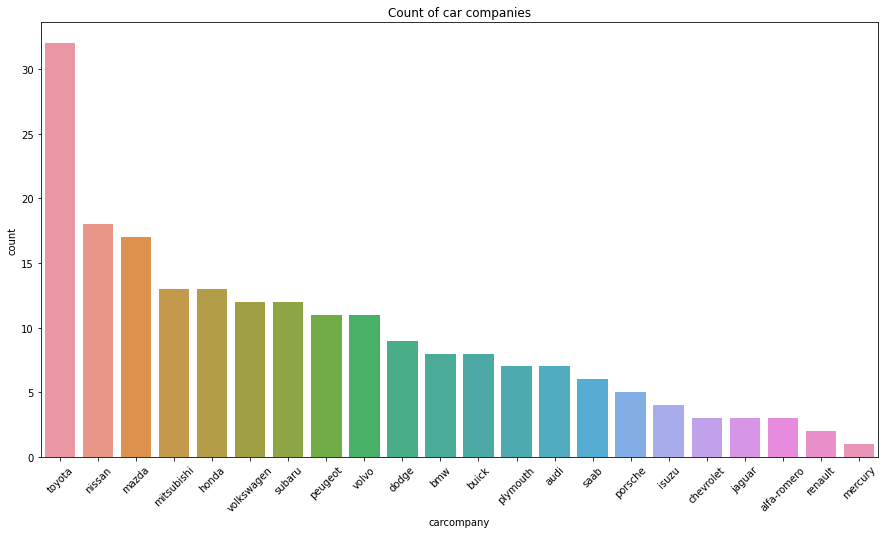

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=df_cat, x='carcompany', ax=ax, order=df_cat["carcompany"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of car companies")
plt.show()

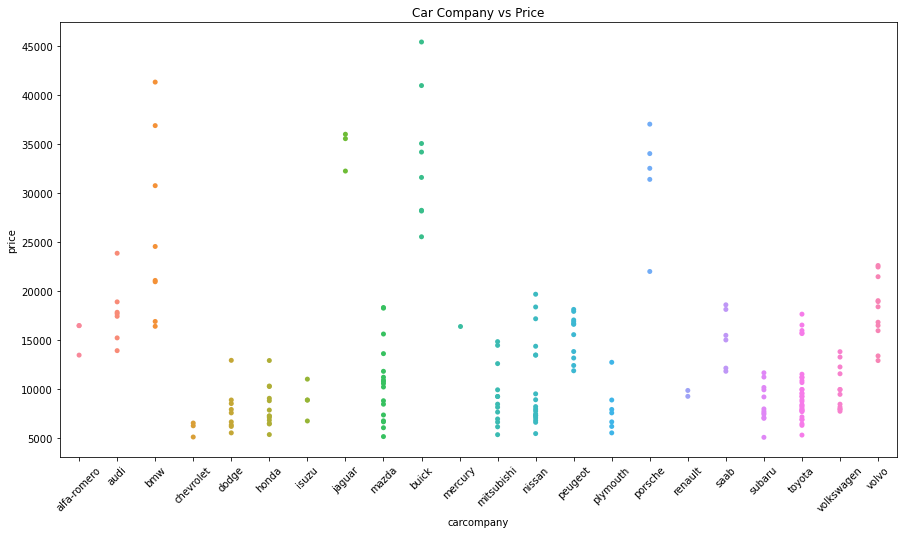

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="carcompany", y="price", data=df_cat, jitter=False, ax=ax)
plt.title("Car Company vs Price")
plt.xticks(rotation=45)
plt.show()

- BMW, Jaguar, Buick and Porsche seemingly have the highest prices (Above 25000)
- Chevrolet seemingly has the lowest price (Below 10000)

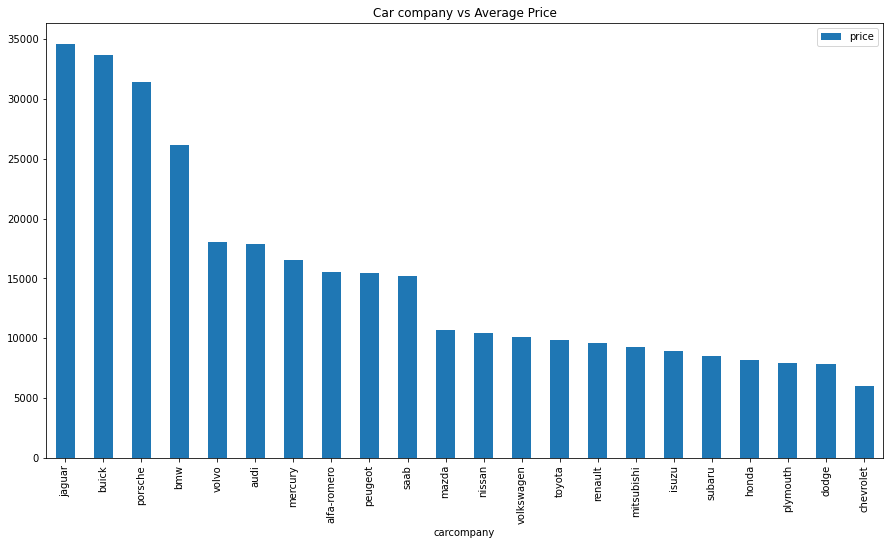

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
df_mean_price_vs_carcompany = df_cat.groupby("carcompany")["price"].mean().sort_values(ascending=False).to_frame()
df_mean_price_vs_carcompany.plot(kind='bar', ax=ax, title="Car company vs Average Price")
plt.show()

- Jaguar, Buick and Porsche seemingly have the highest average prices
- Chevrolet seemingly has the lowest average price

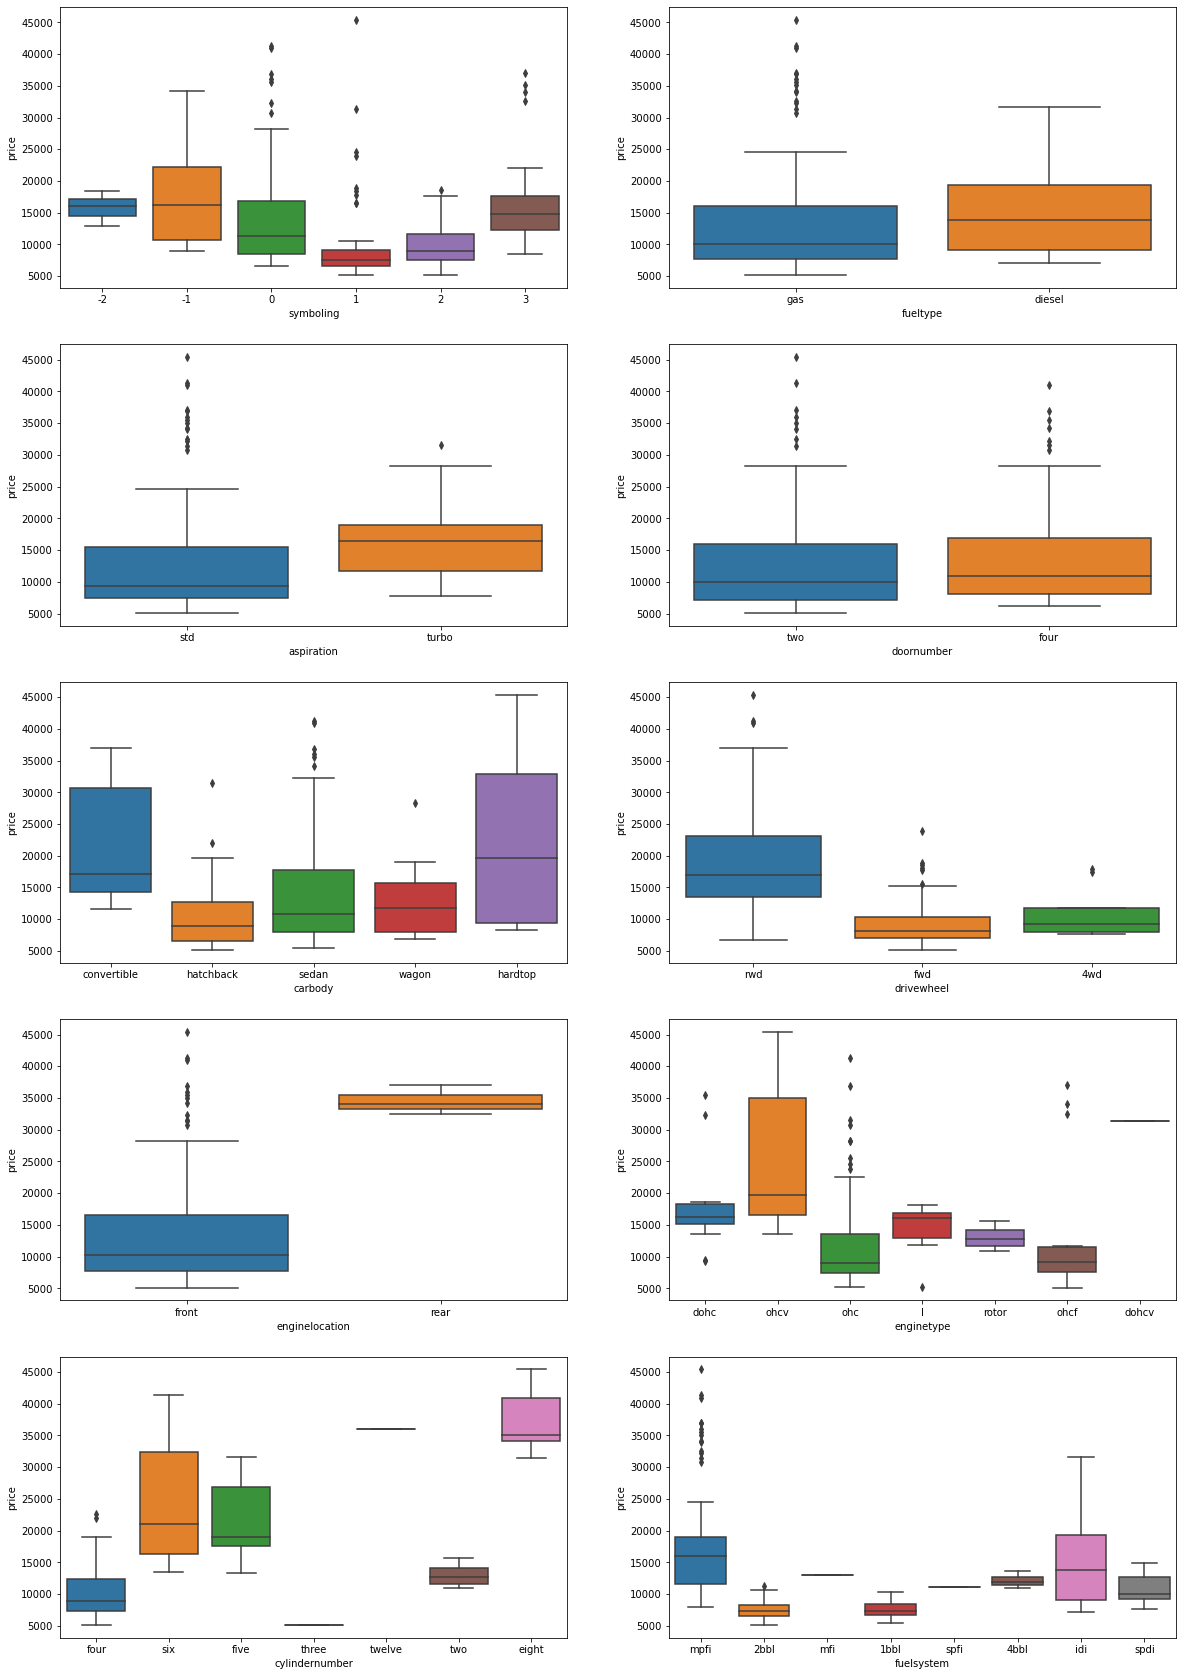

In [19]:
plt.figure(figsize=(20, 30))

cols = df_cat.columns
for i in range(len(cols)):
    col = cols[i]
    if col not in ("price", "carcompany"):
        plt.subplot(5, 2, i+1)
        sns.boxplot(x=col, y="price", data=df_cat)

plt.show()

- Safer cars (-2 and -1) are comparatively more expensive than less safe ones
- Diesel cars are comparatively a little bit more expensive than gas cars
- Turbo cars are comparatively a little bit more expensive than standard cars
- The `door number` doesn't impact the price
- Convertible cars are more expensive than hatchback, sedan and wagon ones
- Cars with rwd `drive wheel` seem to be more expensive than others
- Cars with rear `engine location` are clearly more expensive than front `engine location`
- Cars with ohcv `engine type` seem to be more expensive than others
- The price increase proportionally to `cylinder number` in most cases

In [20]:
def sns_plot(title):
    plt.title(title)
    plt.tick_params(labelsize='large')
    plt.xticks(rotation=45)
    plt.show()

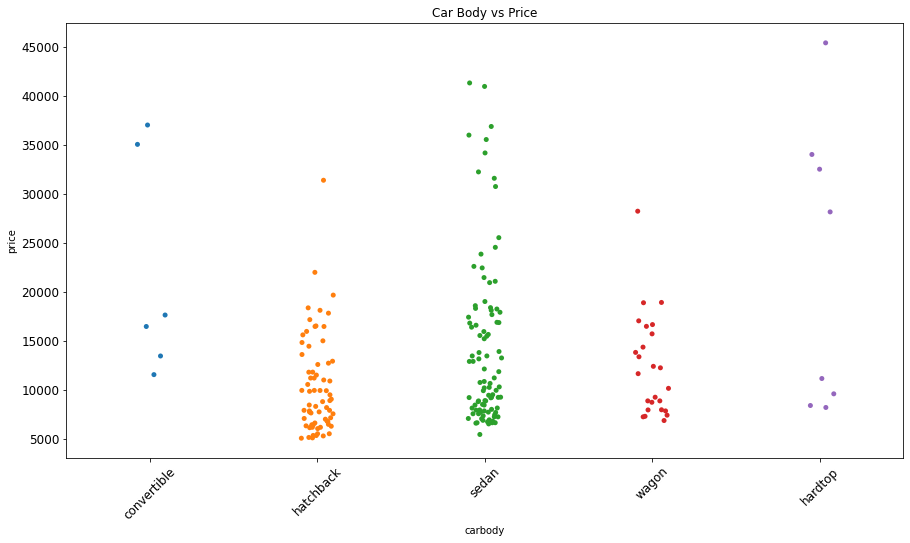

carbody price              
               count          mean
0        sedan    96  14344.270833
1    hatchback    70  10376.652386
2        wagon    25  12371.960000
3      hardtop     8  22208.500000
4  convertible     6  21890.500000

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="carbody", y="price", data=df_cat, ax=ax)
sns_plot("Car Body vs Price")

df_cat[["carbody", "price"]].groupby("carbody").agg(['count', 'mean']).sort_values(("price", "count"), ascending=False).reset_index()

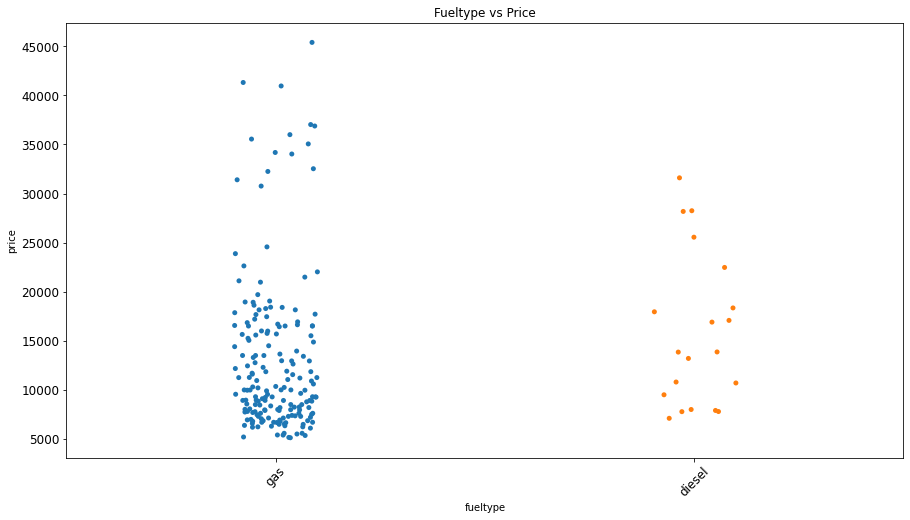

fueltype price            
           count        mean
0      gas   185  12999.7982
1   diesel    20  15838.1500

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="fueltype", y="price", data=df_cat, ax=ax)
sns_plot("Fueltype vs Price")

df_cat[["fueltype", "price"]].groupby("fueltype").agg(['count', 'mean']).sort_values(("price", "count"), ascending=False).reset_index()

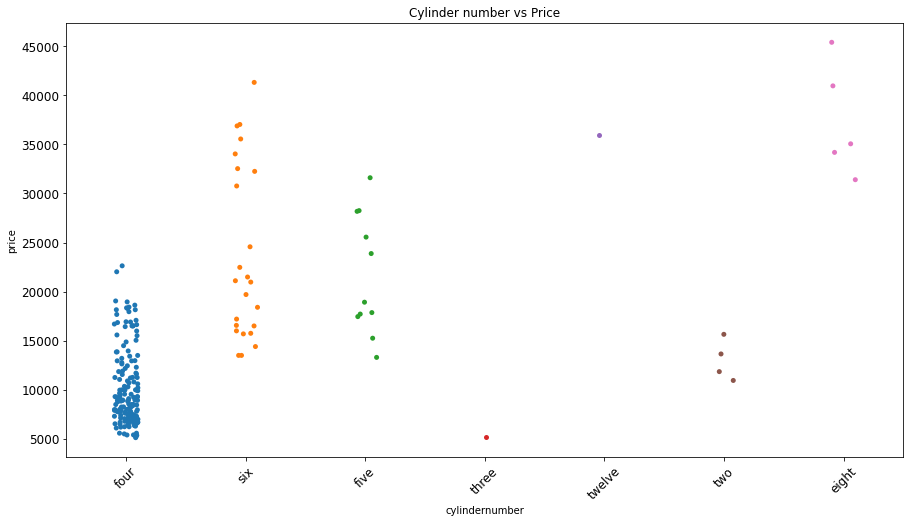

cylindernumber price              
                 count          mean
0           four   159  10285.754717
1            six    24  23671.833333
2           five    11  21630.469727
3          eight     5  37400.100000
4            two     4  13020.000000
5          three     1   5151.000000
6         twelve     1  36000.000000

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="cylindernumber", y="price", data=df_cat, ax=ax)
sns_plot("Cylinder number vs Price")

df_cat[["cylindernumber", "price"]].groupby("cylindernumber").agg(['count', 'mean']).sort_values(("price", "count"), ascending=False).reset_index()

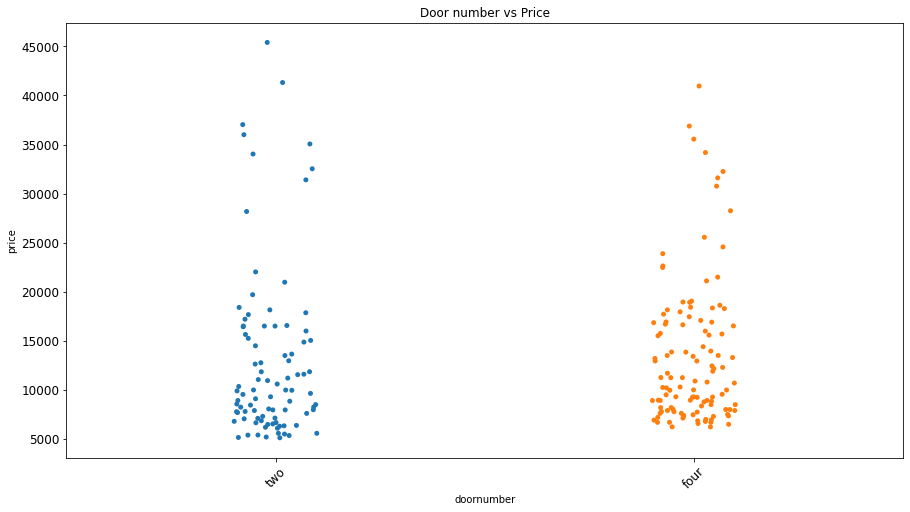

doornumber price              
             count          mean
0       four   115  13501.152174
1        two    90  12989.924078

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x="doornumber", y="price", data=df_cat, ax=ax)
sns_plot("Door number vs Price")

df_cat[["doornumber", "price"]].groupby("doornumber").agg(['count', 'mean']).sort_values(("price", "count"), ascending=False).reset_index()

# Analyzing numerical variables

In [25]:
df_num = df.select_dtypes(include=["int64", "float64"]).copy()

In [26]:
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


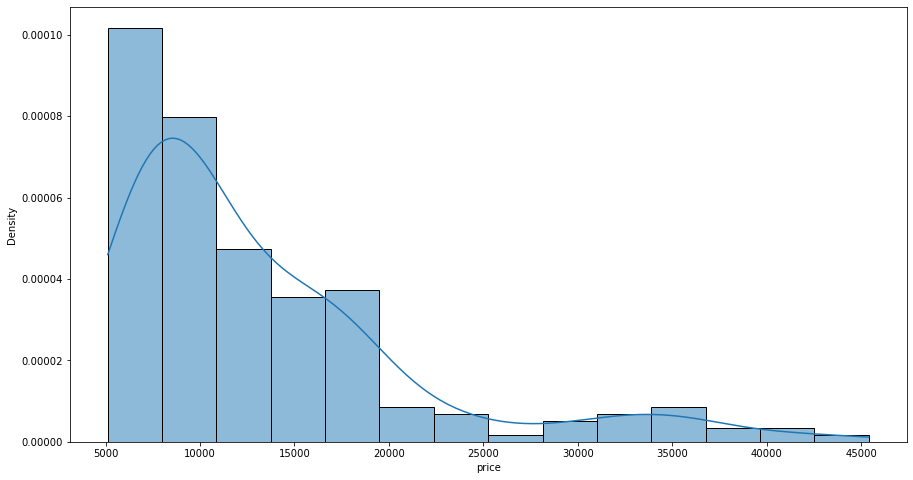

In [27]:
# Plotting car price distribution and density
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(df_num["price"], kde=True, stat='density', ax=ax)
plt.show()

- Most cars are in the price range between 5000 and 20000

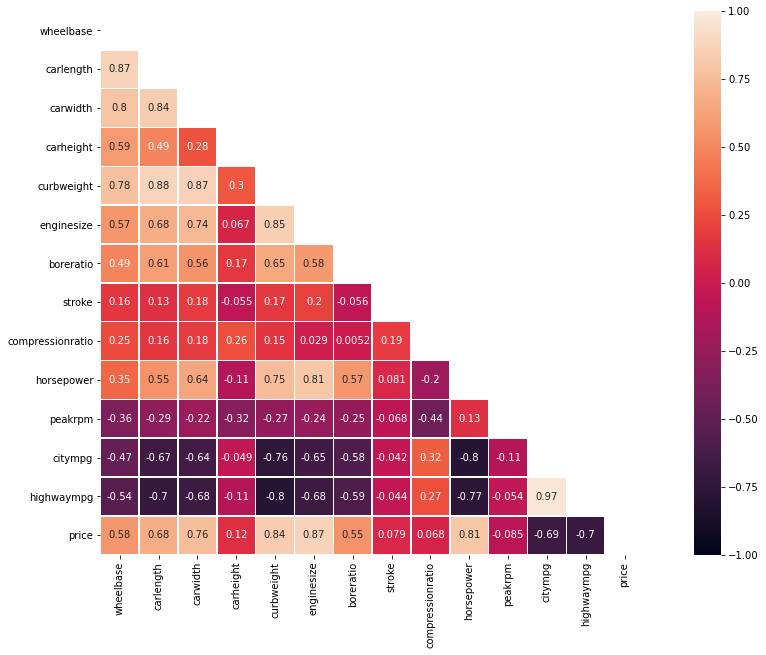

In [28]:
## Correlation Matrix
corr = df_num.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidths=.5, square=True, mask=mask, ax=ax)
plt.show()

- The `curbweight`, `enginesize` and `horsepower` variables have the greater positive correlation with the price
- The `citympg` and `highwaympg` have the greater negative correlation with the price

In [29]:
# Keeping variables with correlation above 0.5 and less than -0.5 in relation to price variable target (price)
cols_to_remove = ['carheight', 'stroke', 'compressionratio', 'peakrpm']
df_num = df_num.drop(cols_to_remove, axis=1, inplace=False)

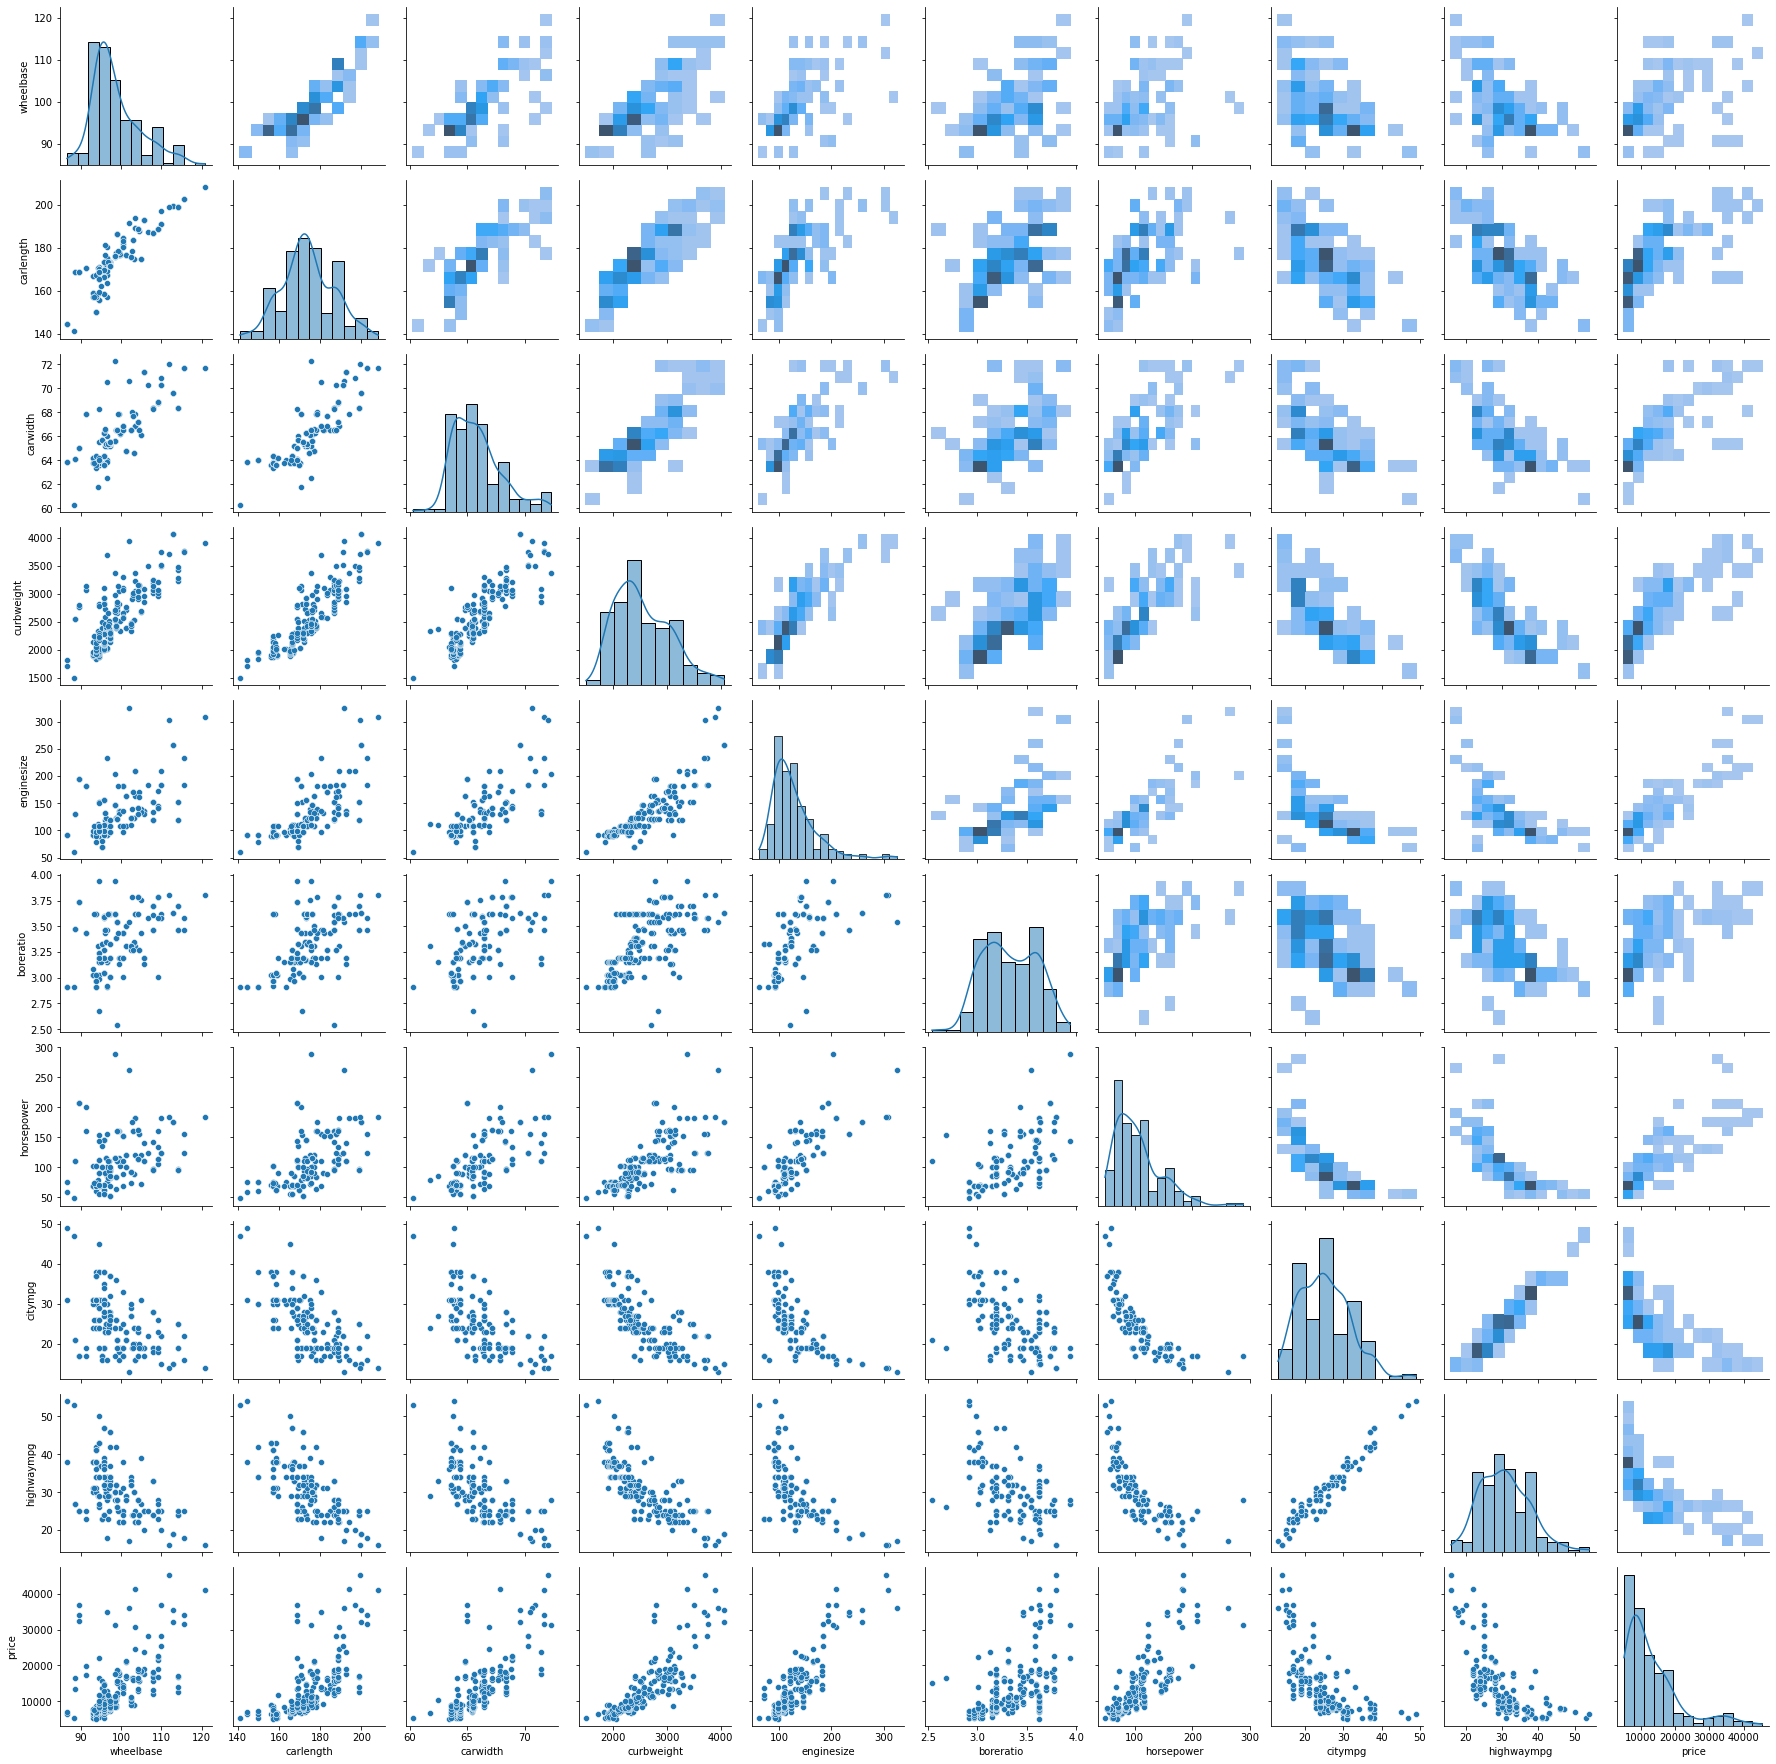

In [30]:
g = sns.PairGrid(df_num)
g.map_upper(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
plt.show()

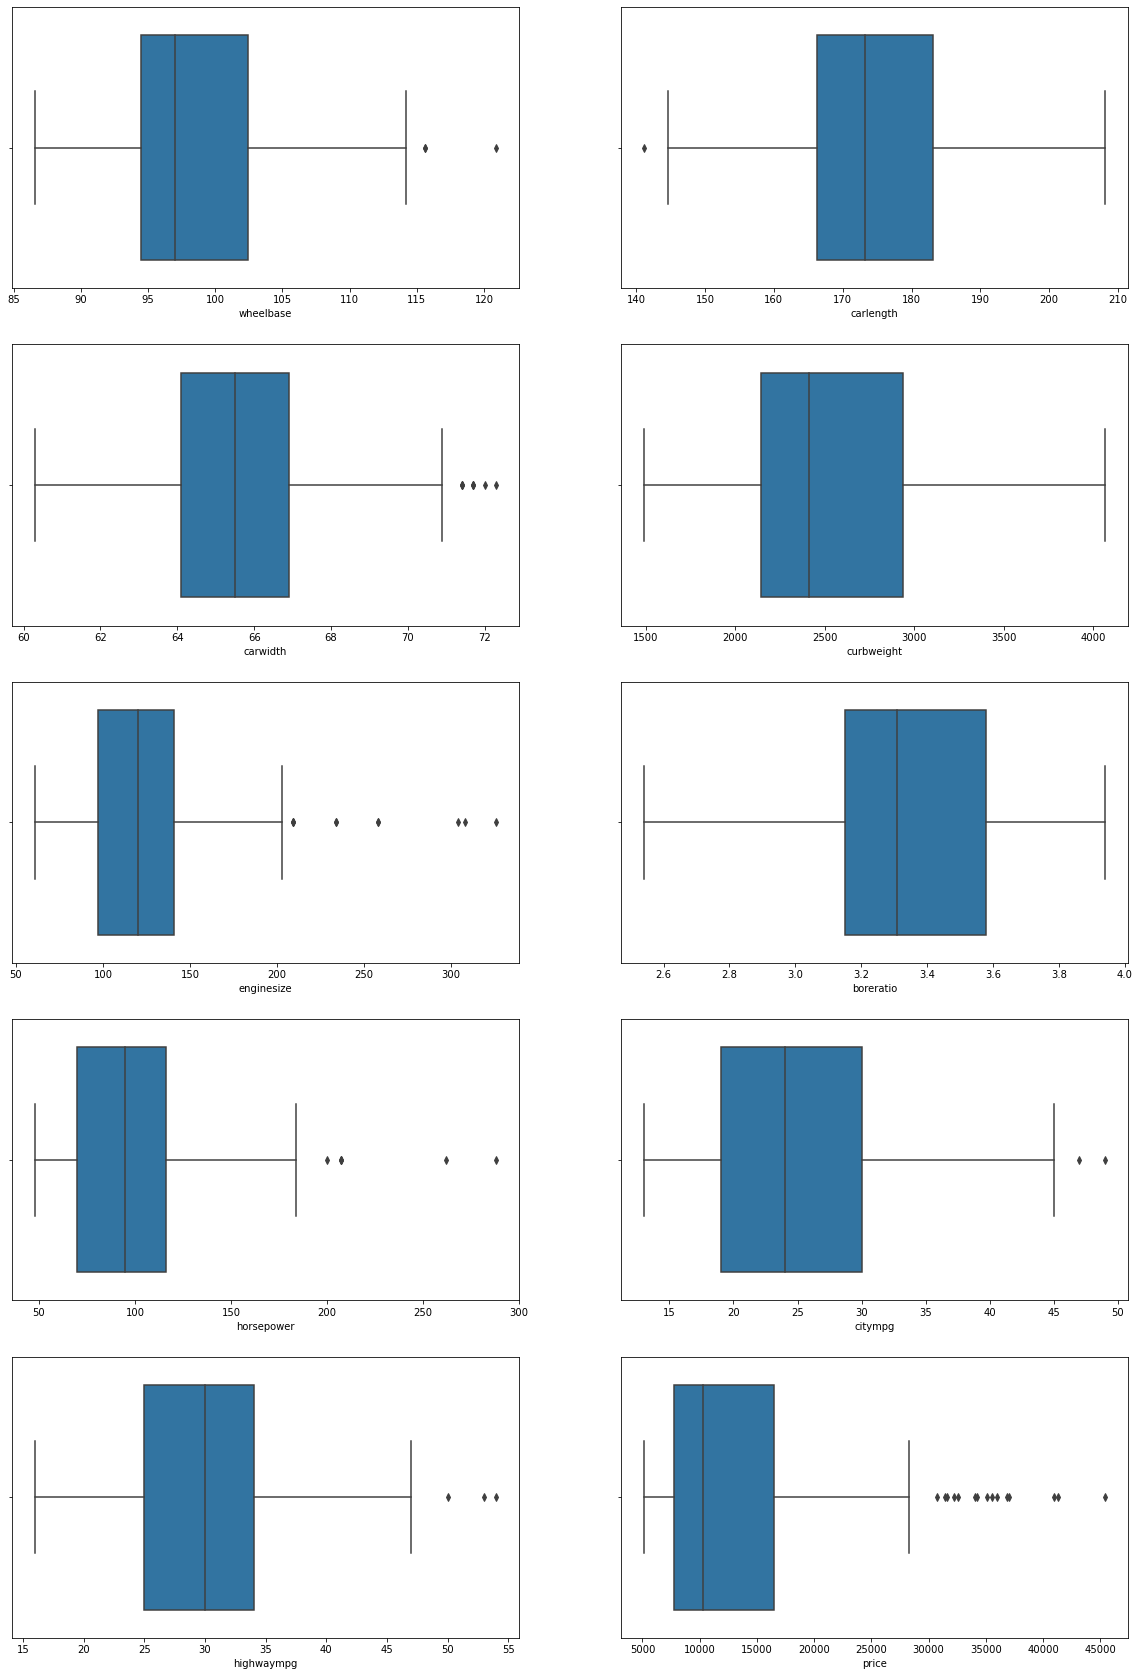

In [31]:
plt.figure(figsize=(20, 30))

cols = df_num.columns
for i in range(len(cols)):
    col = cols[i]
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=col, data=df_num)

plt.show()

# Machine Learning Model

In [32]:
# Creating dataset for Machine Learning Model
cols = list(df_cat.columns[:-1]) + list(df_num.columns)
data = df[cols]

## Splitting data

In [33]:
X = data.iloc[:,:20].values
y = data["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=1997)

In [34]:
train = pd.DataFrame(data=X_train, columns=data.iloc[:,:20].columns)
test = pd.DataFrame(data=X_test, columns=data.iloc[:,:20].columns)

## Pre-processing

### Removing columns 'carcompany' from dataset

In [35]:
train.drop("carcompany", axis=1, inplace=True)
test.drop("carcompany", axis=1, inplace=True)

### Encoding categorical variables

In [36]:
# Encoding binary categorical columns
dummy_cols = ["fueltype", "aspiration", "doornumber", "enginelocation"]
le = LabelEncoder()

for c in dummy_cols:
    le.fit(data[c])
    # Train dataset
    train[c] = le.transform(train[c])
    # Test dataset
    test[c] = le.transform(test[c])

In [37]:
# Encoding multilevels categorical columns
multileves_cols = ["symboling", "carbody", "drivewheel", "enginetype", "cylindernumber", "fuelsystem"]
oe = OneHotEncoder()

for c in multileves_cols:
    oe.fit(data[[c]])
    cols_name = oe.get_feature_names([c])
    
    # Train dataset
    train_data = oe.transform(train[[c]]).toarray()
    train_aux = pd.DataFrame(data=train_data, columns=cols_name) 
    train = train.join(train_aux)
    train.drop(c, axis=1, inplace=True)
    
    # Test dataset
    test_data = oe.transform(test[[c]]).toarray()
    test_aux = pd.DataFrame(data=test_data, columns=cols_name) 
    test = test.join(test_aux)
    test.drop(c, axis=1, inplace=True)

In [38]:
# Function responsible for making predictions and calculating model metrics
def metrics(actual, pred, train):
    """
    Refs: 
    https://www.greycampus.com/blog/data-science/linear-regression-with-python-scikit-learn
    https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914
    """
    print("Starting metrics calculation\n")
    
    # Average of the sum of the square difference between current and predicted
    # Small difference enhances the error
    # Média da soma da diferença quadrada entre atual e previsto
    # Pequena diferença potencializa o erro
    mse = mean_squared_error(actual, pred)
    print(f"Mean Squared Error (MSE): {mse}")
    
    # Square root of MSE
    # Raiz quadrada de MSE
    rmse = mean_squared_error(actual, pred, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    # Average of the absolute difference between current and predicted
    # More robust to outliers and does not penalize error as much as MSE
    # It is not indicated in cases where outliers matter
    # Média da diferença absoluta entre atual e previsto
    # Mais robusto a outliers e não penaliza tanto o erro quanto MSE
    # Não é indicado em casos onde outliers importam
    mae = mean_absolute_error(actual, pred)
    print(f"Mean Absolute Error: {mae}")
    
    # How well the independent variables explain the variability of the dependent variable
    # Quão bem as variáveis independentes explicam a variabilidade da variável dependente
    # Também conhecido como coeficiente de determinação
    r2 = r2_score(actual, pred)
    print(f"Squared R: {r2}")
    
    # Measures the proportion of the variation explained only by independent variables that really explain the dependent variable
    # Mede a proporção da variação explicada apenas por variáveis independentes que realmente explicam a variável dependente
    adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
    print(f"Adjusted Squared R: {adj_r2}")

def ensemble_regressor_model(train, y_train, test, y_test, return_flag=False, with_metrics=True):
    print("Trainning Random Forest Regressor")
    model = RandomForestRegressor(random_state=1997, oob_score=True)
    model.fit(train.values, y_train)
    pred = model.predict(test.values)
    
    if with_metrics:    
        metrics(y_test, pred, train)
    
    if return_flag:
        return model, pred

def xgboost_regressor_model(train, y_train, test, y_test, return_flag=False, with_metrics=True):
    print("Trainning XGBoost Regressor")
    model = XGBRegressor()
    model.fit(train.values, y_train)
    pred = model.predict(test.values)
    
    if with_metrics:    
        metrics(y_test, pred, train)
    
    if return_flag:
        return model, pred

def ols_regressor_model(train, y_train, test, y_test, return_flag=False, with_metrics=True):
    print("Trainning OLS Regressor")
    X = sm.add_constant(train)
    Xtest = sm.add_constant(test)
    model = sm.OLS(y_train, X.astype('float')).fit()
    pred = model.predict(Xtest.astype('float'))
    
    if with_metrics:
        metrics(y_test, pred, train)

    if return_flag:
        return model, pred

## Base Models

In [39]:
ensemble_regressor_model(train, y_train, test, y_test)

Trainning Random Forest Regressor
Starting metrics calculation

Mean Squared Error (MSE): 2734016.2759985253
Root Mean Squared Error (RMSE): 1653.4860979151065
Mean Absolute Error: 1273.8791267142858
Squared R: 0.9428388631999081
Adjusted Squared R: 0.9098871490445609


In [40]:
xgboost_regressor_model(train, y_train, test, y_test)

Trainning XGBoost Regressor
Starting metrics calculation

Mean Squared Error (MSE): 3610069.736272335
Root Mean Squared Error (RMSE): 1900.0183515619883
Mean Absolute Error: 1366.0522181919644
Squared R: 0.9245228743279631
Adjusted Squared R: 0.8810125312934948


In [41]:
ols_regressor_model(train, y_train, test, y_test)

Trainning OLS Regressor
Starting metrics calculation

Mean Squared Error (MSE): 8182041.784772425
Root Mean Squared Error (RMSE): 2860.42685359588
Mean Absolute Error: 1960.0104615391574
Squared R: 0.8289348845984348
Adjusted Squared R: 0.730320876896356


## Models Version 2

In [42]:
train_v2 = train.copy()
test_v2 = test.copy()

### Pre-processing

In [43]:
num_cols = df_num.columns[:-1]

scaler = StandardScaler()
scaler.fit(train_v2[num_cols])
train_v2[num_cols] = scaler.transform(train_v2[num_cols])
test_v2[num_cols] = scaler.transform(test_v2[num_cols])

### Evaluation

In [44]:
ensemble_regressor_model(train_v2, y_train, test_v2, y_test)

Trainning Random Forest Regressor
Starting metrics calculation

Mean Squared Error (MSE): 2727067.840257328
Root Mean Squared Error (RMSE): 1651.383613899971
Mean Absolute Error: 1270.5576267142858
Squared R: 0.9429841368361463
Adjusted Squared R: 0.9101161686593366


In [45]:
xgboost_regressor_model(train_v2, y_train, test_v2, y_test)

Trainning XGBoost Regressor
Starting metrics calculation

Mean Squared Error (MSE): 3593648.520855849
Root Mean Squared Error (RMSE): 1895.6920954774932
Mean Absolute Error: 1352.5045061383928
Squared R: 0.9248661990364098
Adjusted Squared R: 0.8815537725985754


In [46]:
ols_regressor_model(train_v2, y_train, test_v2, y_test)

Trainning OLS Regressor
Starting metrics calculation

Mean Squared Error (MSE): 8135408.6494993465
Root Mean Squared Error (RMSE): 2852.263776283559
Mean Absolute Error: 1939.4098842276521
Squared R: 0.8299098616123474
Adjusted Squared R: 0.7318578994829947


- **In general, after standardization, the models had a small improvement compared to the first version. Let's keep**

## Models Version 3

In [47]:
train_v3 = train_v2.copy()
test_v3 = test_v2.copy()

### Feature Selection (SelectKBest)

Using the SelectKBest method to select variables for all models. The functions f_regression and mutual_info_regression were used

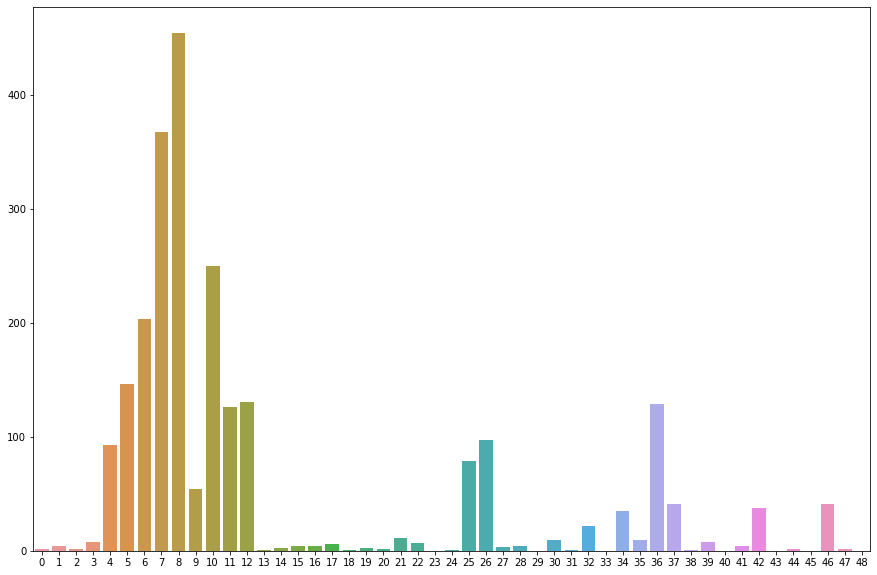

In [48]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(train_v3.values, y_train)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=[i for i in range(len(fs.scores_))], y=fs.scores_, ax=ax)
plt.show()

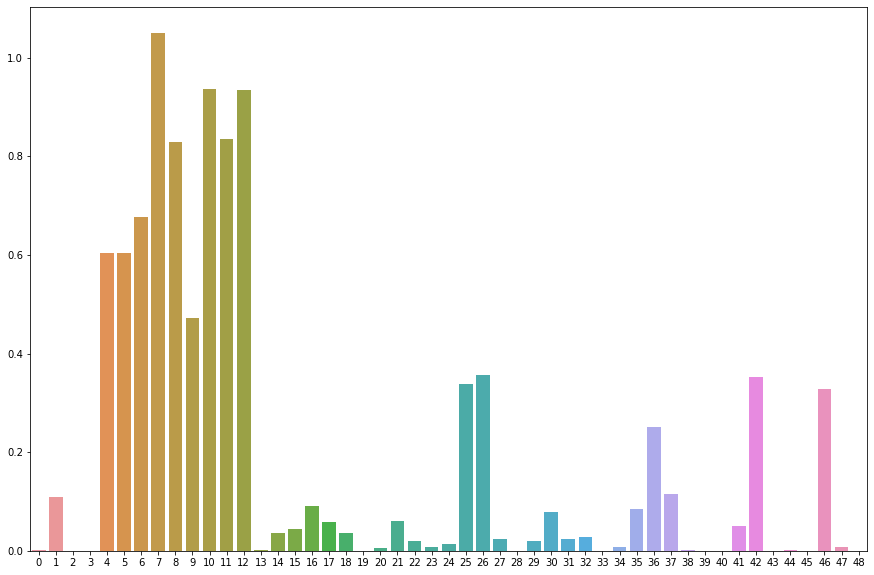

In [49]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(train_v3.values, y_train)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=[i for i in range(len(fs.scores_))], y=fs.scores_, ax=ax)
plt.show()

In [50]:
cols_idx = [1,4,5,6,7,8,9,10,11,12,25,26,36,42,46]
train_v3 = train_v3.iloc[:, cols_idx]
test_v3 = test_v3.iloc[:, cols_idx]

### Evaluation

In [51]:
ensemble_regressor_model(train_v3, y_train, test_v3, y_test)

Trainning Random Forest Regressor
Starting metrics calculation

Mean Squared Error (MSE): 2766912.4030978577
Root Mean Squared Error (RMSE): 1663.4038604914494
Mean Absolute Error: 1311.0311933333335
Squared R: 0.9421510911343846
Adjusted Squared R: 0.9348592118656095


In [52]:
xgboost_regressor_model(train_v3, y_train, test_v3, y_test)

Trainning XGBoost Regressor
Starting metrics calculation

Mean Squared Error (MSE): 3711508.4521744796
Root Mean Squared Error (RMSE): 1926.5275633051501
Mean Absolute Error: 1385.139634486607
Squared R: 0.9224020558209882
Adjusted Squared R: 0.9126208023530455


In [53]:
ols_regressor_model(train_v3, y_train, test_v3, y_test)

Trainning OLS Regressor
Starting metrics calculation

Mean Squared Error (MSE): 9891679.7620503
Root Mean Squared Error (RMSE): 3145.104093992805
Mean Absolute Error: 2191.3087704831955
Squared R: 0.7931908214940109
Adjusted Squared R: 0.7671224376487181


- **With the selected variables all the models increased the error a little but had a significant gain in the explanation of the target variable (Adjusted R²) compared to second model**

## Models Version 4

In [54]:
train_v4 = train_v2.copy()
test_v4 = test_v2.copy()

### Feature Selection (RFE)

Using the Recursive Feature Eliminatin to select the features for each model

In [55]:
forest_model, _ = ensemble_regressor_model(train_v4, y_train, test_v4, y_test, return_flag=True, with_metrics=False)
ols_model, _ = ols_regressor_model(train_v4, y_train, test_v4, y_test, return_flag=True, with_metrics=False)
xgboost_model, _ = xgboost_regressor_model(train_v4, y_train, test_v4, y_test, return_flag=True, with_metrics=False)

Trainning Random Forest Regressor
Trainning OLS Regressor
Trainning XGBoost Regressor


In [56]:
rfe_forest = RFE(forest_model, n_features_to_select=15)
rfe_forest = rfe_forest.fit(train_v4, y_train)

train_forest = train_v4[train_v4.columns[rfe_forest.support_]]
test_forest = test_v4[test_v4.columns[rfe_forest.support_]]

train_forest.head()

,aspiration,doornumber,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,symboling_1,carbody_sedan,enginetype_ohc,fuelsystem_mpfi
0,0,1,-0.017626,0.912408,0.185534,0.233115,-0.181947,-2.831078,0.081725,-0.603007,-0.358860,0.0,0.0,1.0,1.0
1,0,0,1.059585,1.380988,2.377156,0.693668,0.157944,-0.527841,0.081725,-0.907328,-0.791415,1.0,0.0,1.0,1.0
2,0,1,-0.499959,0.159607,0.230261,-0.227438,0.067307,0.428888,-0.405378,-0.298686,0.073694,0.0,0.0,1.0,1.0
3,0,0,-0.435648,-0.869732,-0.932640,-1.066502,-0.839069,-1.520005,-0.746351,0.766439,0.506249,0.0,1.0,1.0,0.0
4,0,0,-0.757204,-0.347381,-1.022094,-1.040398,-0.725772,-0.669579,-0.916837,0.918599,0.938804,1.0,0.0,1.0,0.0


In [57]:
rfe_xgboost = RFE(xgboost_model, n_features_to_select=15)
rfe_xgboost = rfe_xgboost.fit(train_v4, y_train)

train_xgboost = train_v4[train_v4.columns[rfe_xgboost.support_]]
test_xgboost = test_v4[test_v4.columns[rfe_xgboost.support_]]

train_xgboost.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,symboling_0,drivewheel_rwd,enginetype_ohc,cylindernumber_six,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-0.017626,0.912408,0.185534,0.233115,-0.181947,0.081725,-0.603007,-0.358860,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.059585,1.380988,2.377156,0.693668,0.157944,0.081725,-0.907328,-0.791415,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.499959,0.159607,0.230261,-0.227438,0.067307,-0.405378,-0.298686,0.073694,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.435648,-0.869732,-0.932640,-1.066502,-0.839069,-0.746351,0.766439,0.506249,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.757204,-0.347381,-1.022094,-1.040398,-0.725772,-0.916837,0.918599,0.938804,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
# To apply RFE to the OLS model, it was necessary to use Linear Regression
lm = LinearRegression()
lm.fit(train_v4, y_train)

rfe_ols = RFE(lm, n_features_to_select=15)
rfe_ols = rfe_ols.fit(train_v4, y_train)

train_ols = train_v4[train_v4.columns[rfe_ols.support_]]
test_ols = test_v4[test_v4.columns[rfe_ols.support_]]

train_ols.head()

,enginelocation,curbweight,horsepower,carbody_convertible,enginetype_dohcv,enginetype_ohc,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi
0,0,0.233115,0.081725,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0.693668,0.081725,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.227438,-0.405378,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,-1.066502,-0.746351,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,-1.040398,-0.916837,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Evaluation

In [59]:
ensemble_regressor_model(train_forest, y_train, test_forest, y_test)

Trainning Random Forest Regressor
Starting metrics calculation

Mean Squared Error (MSE): 2638877.198507648
Root Mean Squared Error (RMSE): 1624.4621259074179
Mean Absolute Error: 1242.202955142857
Squared R: 0.9448279727276135
Adjusted Squared R: 0.9378735155084051


In [60]:
xgboost_regressor_model(train_xgboost, y_train, test_xgboost, y_test)

Trainning XGBoost Regressor
Starting metrics calculation

Mean Squared Error (MSE): 3545002.4634332894
Root Mean Squared Error (RMSE): 1882.8176925643356
Mean Absolute Error: 1364.7924595424108
Squared R: 0.9258832609930363
Adjusted Squared R: 0.9165408148997216


In [61]:
ols_regressor_model(train_ols, y_train, test_ols, y_test)

Trainning OLS Regressor
Starting metrics calculation

Mean Squared Error (MSE): 7033410.371595452
Root Mean Squared Error (RMSE): 2652.0577617381286
Mean Absolute Error: 1861.03155636458
Squared R: 0.8529497662646064
Adjusted Squared R: 0.8344140225164476


- **All methods reduced the error and increased or maintained the model's explanability**
- **For the purpose of this project, we will continue with the Random Forest, which in comparison with the other models presented better error and explainability metrics**

## Final Model

Before generating the final model we will try to optimize it by doing a parameter search with Grid Search CV

### Grid Search CV

In [63]:
# This cell was run in a virtual machine in the cloud as it requires high processing. Its result is simulated below using the parameters found.
params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 400],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [12, 15, 20],
    'bootstrap': [True, False],
    'criterion': ['mse', 'mae']
}

rf = RandomForestRegressor(random_state=1997)
rf_gs = GridSearchCV(estimator=rf, param_grid=params, cv=5, verbose=1)

rf_gs.fit(train_forest, y_train)

In [67]:
# {
#    'bootstrap': True,
#     'criterion': 'mse',
#     'max_depth': 12,
#     'max_features': 'auto',
#     'min_samples_leaf': 1,
#     'min_samples_split': 2,
#     'n_estimators': 100
# }

rf_model_gs = rf_gs.best_estimator_
rf_gs.best_params_

NameError: name 'rf_gs' is not defined

In [62]:
# Using the best params to create a Random Forest Regressor and measure
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=1997)
model.fit(train_forest.values, y_train)
pred = model.predict(test_forest.values)
metrics(y_test, pred, train_forest)

Starting metrics calculation

Mean Squared Error (MSE): 2657961.531482699
Root Mean Squared Error (RMSE): 1630.3255906360234
Mean Absolute Error: 1246.6632004761902
Squared R: 0.9444289691893017
Adjusted Squared R: 0.9374242174064407


- **The model created with the best parameters had a relatively lower performance than the model created using the RFE method. Therefore, the model with RFE will be chosen.**

### Saving the final model

In [ ]:
model, _ = ensemble_regressor_model(train_forest, y_train, test_forest, y_test, with_metrics=False, return_flag=True)

filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Print our final tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=800)
tree.plot_tree(model.estimators_[0], feature_names=train_forest.columns, filled=True)
plt.show()

## End